In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
from xgboost import XGBRegressor
import joblib

In [4]:
df = pd.read_csv("dataset.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

C:\Users\anita\AppData\Local\Temp\ipykernel_38556\1958296656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=m_values, y=m_values.index,palette="viridis")


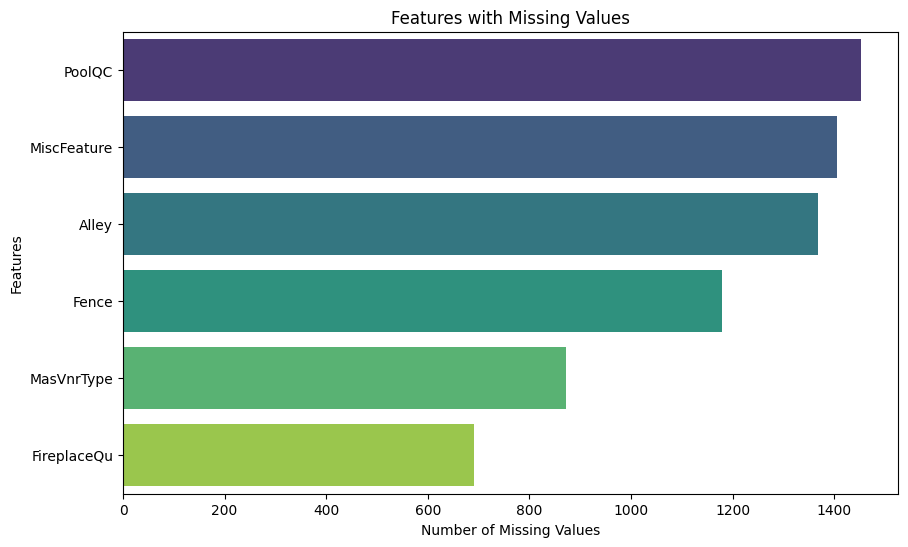

In [6]:
m_values = missing_values[missing_values > 500]
plt.figure(figsize=(10,6))
sns.barplot(x=m_values, y=m_values.index,palette="viridis")
plt.title("Features with Missing Values")
plt.xlabel("Number of Missing Values")
plt.ylabel("Features")
plt.show()

In [7]:
df = df.drop(columns=['Id','PoolQC','FireplaceQu','Fence','Alley','MiscFeature', 'MasVnrType'])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [8]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [9]:
c_columns = df.select_dtypes(include=['object','category']).columns
print("Categorical Columns:")
print(c_columns)

Categorical Columns:
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [10]:
label_encoder = LabelEncoder()
c_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']

for col in c_columns:
    df[col] = label_encoder.fit_transform(df[col])

df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


In [11]:
corr_matrix = df.corr()
corr_with_price = corr_matrix['SalePrice'].sort_values(ascending=False)
print("Correelated Features", corr_with_price.head(20))

Correelated Features SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Foundation      0.382479
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64


In [12]:
c_features = corr_with_price[corr_with_price >0.25].index
df = df[c_features]
df

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,Fireplaces,BsmtFinSF1,Foundation,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,CentralAir
0,208500,7,1710,2,548,856,856,2,8,2003,...,0,706,2,65.0,0,854,61,1,8450,1
1,181500,6,1262,2,460,1262,1262,2,6,1976,...,1,978,1,80.0,298,0,0,0,9600,1
2,223500,7,1786,2,608,920,920,2,6,2001,...,1,486,2,68.0,0,866,42,1,11250,1
3,140000,7,1717,3,642,756,961,1,7,1915,...,1,216,0,60.0,0,756,35,0,9550,1
4,250000,8,2198,3,836,1145,1145,2,9,2000,...,1,655,2,84.0,192,1053,84,1,14260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,...,1,0,2,62.0,0,694,40,1,7917,1
1456,210000,6,2073,2,500,1542,2073,2,7,1978,...,2,790,1,85.0,349,0,0,0,13175,1
1457,266500,7,2340,1,252,1152,1188,2,9,1941,...,2,275,4,66.0,0,1152,60,0,9042,1
1458,142125,5,1078,1,240,1078,1078,1,5,1950,...,0,49,1,68.0,366,0,0,0,9717,1


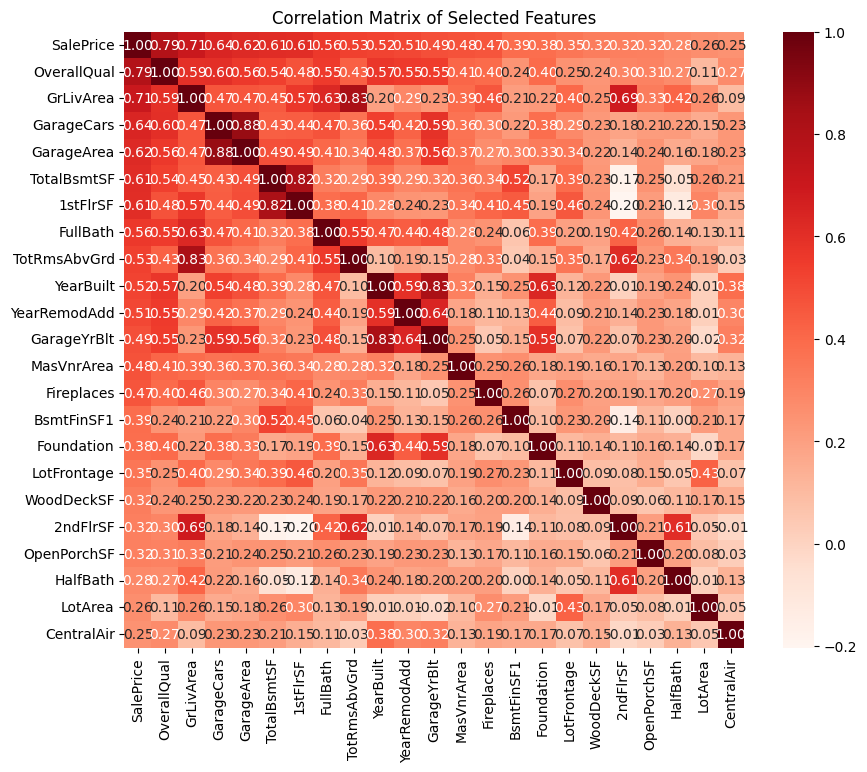

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df[corr_with_price[corr_with_price >0.25].index].corr(), annot=True, fmt=".2f", cmap="Reds")
plt.title("Correlation Matrix of Selected Features")
plt.show()

In [14]:
df

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,Fireplaces,BsmtFinSF1,Foundation,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,CentralAir
0,208500,7,1710,2,548,856,856,2,8,2003,...,0,706,2,65.0,0,854,61,1,8450,1
1,181500,6,1262,2,460,1262,1262,2,6,1976,...,1,978,1,80.0,298,0,0,0,9600,1
2,223500,7,1786,2,608,920,920,2,6,2001,...,1,486,2,68.0,0,866,42,1,11250,1
3,140000,7,1717,3,642,756,961,1,7,1915,...,1,216,0,60.0,0,756,35,0,9550,1
4,250000,8,2198,3,836,1145,1145,2,9,2000,...,1,655,2,84.0,192,1053,84,1,14260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,...,1,0,2,62.0,0,694,40,1,7917,1
1456,210000,6,2073,2,500,1542,2073,2,7,1978,...,2,790,1,85.0,349,0,0,0,13175,1
1457,266500,7,2340,1,252,1152,1188,2,9,1941,...,2,275,4,66.0,0,1152,60,0,9042,1
1458,142125,5,1078,1,240,1078,1078,1,5,1950,...,0,49,1,68.0,366,0,0,0,9717,1


In [15]:
df.sample(5)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,Fireplaces,BsmtFinSF1,Foundation,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,CentralAir
589,79500,5,935,1,308,742,779,1,4,1930,...,0,0,0,50.0,0,0,0,0,9100,1
54,130000,5,1360,2,572,384,1360,1,6,1955,...,1,384,1,60.0,0,0,50,0,7134,1
1304,130000,7,1708,2,380,976,976,2,7,2004,...,0,0,2,32.0,0,732,40,0,3363,1
594,110000,5,924,1,280,924,924,1,5,1975,...,0,0,1,88.0,0,0,0,0,7990,1
1114,117000,5,833,1,326,833,833,1,4,1954,...,0,415,1,90.0,0,0,0,0,5400,1


In [16]:
df.isnull().sum()

SalePrice         0
OverallQual       0
GrLivArea         0
GarageCars        0
GarageArea        0
TotalBsmtSF       0
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
GarageYrBlt      81
MasVnrArea        8
Fireplaces        0
BsmtFinSF1        0
Foundation        0
LotFrontage     259
WoodDeckSF        0
2ndFlrSF          0
OpenPorchSF       0
HalfBath          0
LotArea           0
CentralAir        0
dtype: int64

In [17]:
df.isnull().sum()

SalePrice         0
OverallQual       0
GrLivArea         0
GarageCars        0
GarageArea        0
TotalBsmtSF       0
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
GarageYrBlt      81
MasVnrArea        8
Fireplaces        0
BsmtFinSF1        0
Foundation        0
LotFrontage     259
WoodDeckSF        0
2ndFlrSF          0
OpenPorchSF       0
HalfBath          0
LotArea           0
CentralAir        0
dtype: int64

In [18]:
x = df.drop('SalePrice', axis=1)
y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
x
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [20]:
# Add these checks before model training
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("\nNull values in training data:")
print(x_train.isnull().sum().sum())
print("\nData types:")
print(x_train.dtypes)

Training data shape: (1168, 22)
Training labels shape: (1168,)

Null values in training data:
287

Data types:
OverallQual       int64
GrLivArea         int64
GarageCars        int64
GarageArea        int64
TotalBsmtSF       int64
1stFlrSF          int64
FullBath          int64
TotRmsAbvGrd      int64
YearBuilt         int64
YearRemodAdd      int64
GarageYrBlt     float64
MasVnrArea      float64
Fireplaces        int64
BsmtFinSF1        int64
Foundation        int64
LotFrontage     float64
WoodDeckSF        int64
2ndFlrSF          int64
OpenPorchSF       int64
HalfBath          int64
LotArea           int64
CentralAir        int64
dtype: object


In [21]:
model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.01,
    max_depth=6,
    n_estimators=1000,
    subsample=0.65,
    random_state=42
)

model.fit(
    x_train,
    y_train
)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [22]:
model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.01,
    max_depth=6,
    n_estimators=1000,
    subsample=0.65,
    random_state=42,
    booster='gbtree',  # Explicitly set booster
    colsample_bytree=1.0,  # Explicitly set column sampling
    min_child_weight=1,  # Explicitly set minimum child weight
    reg_alpha=0,  # L1 regularization
    reg_lambda=1,  # L2 regularization
    base_score=0.5  # Initial prediction score
)

# Add callbacks for better training visibility
model.fit(
    x_train,
    y_train,
    eval_set=[(x_test, y_test)],
    verbose=True,
)

[0]	validation_0-rmse:197258.30923
[1]	validation_0-rmse:195475.00569
[2]	validation_0-rmse:193686.02684
[3]	validation_0-rmse:191877.21329
[4]	validation_0-rmse:190149.50984
[5]	validation_0-rmse:188389.44071
[6]	validation_0-rmse:186729.24838
[7]	validation_0-rmse:185018.57461
[8]	validation_0-rmse:183367.24346
[9]	validation_0-rmse:181645.61333
[10]	validation_0-rmse:180009.81119
[11]	validation_0-rmse:178392.80263
[12]	validation_0-rmse:176781.98401
[13]	validation_0-rmse:175247.85857
[14]	validation_0-rmse:173647.52812
[15]	validation_0-rmse:172045.24062
[16]	validation_0-rmse:170503.36059
[17]	validation_0-rmse:168965.31965
[18]	validation_0-rmse:167477.89145
[19]	validation_0-rmse:165936.19813
[20]	validation_0-rmse:164426.38004
[21]	validation_0-rmse:162960.23450
[22]	validation_0-rmse:161530.79358
[23]	validation_0-rmse:160078.18994
[24]	validation_0-rmse:158648.88667
[25]	validation_0-rmse:157252.51212
[26]	validation_0-rmse:155864.60324
[27]	validation_0-rmse:154476.98745
[2

,objective,'reg:squarederror'
,base_score,0.5
,booster,'gbtree'
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1.0
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [23]:
# Print model parameters
print("\nModel Parameters:")
print(model.get_params())

# Print feature importances
print("\nFeature Importances:")
for feature, importance in zip(x_train.columns, model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Make predictions and evaluate
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.4f}")


Model Parameters:
{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 1000, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.65, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}

Feature Importances:
OverallQual: 0.3819
GrLivArea: 0.0658
GarageC

In [24]:
y_pred = model.predict(x_test)

In [25]:
mae=mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

r2score = r2_score(y_test, y_pred)
print(f"R2 Score: {r2score}")

Mean Absolute Error: 17572.810546875
R2 Score: 0.900994598865509


In [26]:
joblib.dump(model, 'xgb_model.jb')

['xgb_model.jb']

In [27]:
df.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'Foundation', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF',
       'HalfBath', 'LotArea', 'CentralAir'],
      dtype='object')

In [28]:
# Check the columns in your dataframe
print("DataFrame columns:", df.columns.tolist())

# Properly separate features and target
x = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Verify the separation
print("\nFeature columns:", x.columns.tolist())
print("Target column:", y.name)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Verify shapes
print("\nShapes:")
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")

DataFrame columns: ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'Foundation', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'CentralAir']

Feature columns: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'Foundation', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'CentralAir']
Target column: SalePrice

Shapes:
x_train: (1168, 22)
y_train: (1168,)
x_test: (292, 22)
y_test: (292,)


In [29]:
# Initialize and fit the model
model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.01,
    max_depth=6,
    n_estimators=1000,
    subsample=0.65,
    random_state=42,
    enable_categorical=False  # Add this to handle any categorical features
)

# Fit the model with proper feature names
model.fit(
    x_train,
    y_train,
    eval_set=[(x_test, y_test)],
    verbose=True
)

[0]	validation_0-rmse:86942.55322
[1]	validation_0-rmse:86358.57499
[2]	validation_0-rmse:85771.64087
[3]	validation_0-rmse:85136.09539
[4]	validation_0-rmse:84533.82776
[5]	validation_0-rmse:83927.41828
[6]	validation_0-rmse:83400.58424
[7]	validation_0-rmse:82804.14128
[8]	validation_0-rmse:82219.33975
[9]	validation_0-rmse:81614.40331
[10]	validation_0-rmse:81050.65070
[11]	validation_0-rmse:80469.71869
[12]	validation_0-rmse:79890.64265
[13]	validation_0-rmse:79401.89206
[14]	validation_0-rmse:78852.70783
[15]	validation_0-rmse:78281.19949
[16]	validation_0-rmse:77766.30214
[17]	validation_0-rmse:77203.03511
[18]	validation_0-rmse:76721.51479
[19]	validation_0-rmse:76168.41492
[20]	validation_0-rmse:75601.79791
[21]	validation_0-rmse:75090.73482
[22]	validation_0-rmse:74660.95953
[23]	validation_0-rmse:74160.42278
[24]	validation_0-rmse:73758.10735
[25]	validation_0-rmse:73277.48481
[26]	validation_0-rmse:72766.47366
[27]	validation_0-rmse:72283.65224
[28]	validation_0-rmse:71848.9

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [30]:
y_pred = model.predict(x_test)

In [31]:
mae=mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

r2score = r2_score(y_test, y_pred)
print(f"R2 Score: {r2score}")

Mean Absolute Error: 17392.37109375
R2 Score: 0.905262291431427


In [32]:
joblib.dump(model, 'xgb_model.jb')

['xgb_model.jb']